**Hessam Kaveh - Y3210029**

**Problem Set 4**

 Problem 1- Part a

-------------------------------------------
Confusion Matrix: 
 [[11  0  0]
 [ 0  9  4]
 [ 0  3  3]]
Classification Report: 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.69      0.72        13
           2       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30

-------------------------------------------
   C_parameter  Accuracy
0         0.01  0.566667
1         0.10  0.733333
2         1.00  0.733333
3        10.00  0.733333
4       100.00  0.733333
5      1000.00  0.766667


-------------------------------------------
Confusion Matrix: 
 [[11  0  0]
 [ 0  5  8]
 [ 0  3  3]]
Classification Report: 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.62      0.38      0.48        13
           2       0.27      0.50      0.35         6

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.61        30
weighted avg       0.69      0.63      0.64        30

-------------------------------------------
   degree  Accuracy
0       1  0.666667
1       2       0.6
2       3  0.633333


-------------------------------------------
Confusion Matrix: 
 [[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]
Classification Report: 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      0.38      0.50        13
           2       0.33      0.67      0.44         6

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.74      0.67      0.67        30

-------------------------------------------
   degree  Accuracy
0       1  0.633333
1       2  0.666667
2       3  0.666667
3       4  0.666667
4       5  0.666667
5       6  0.666667


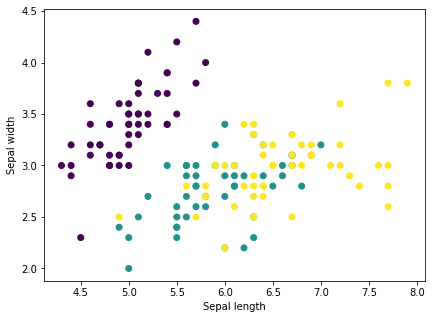

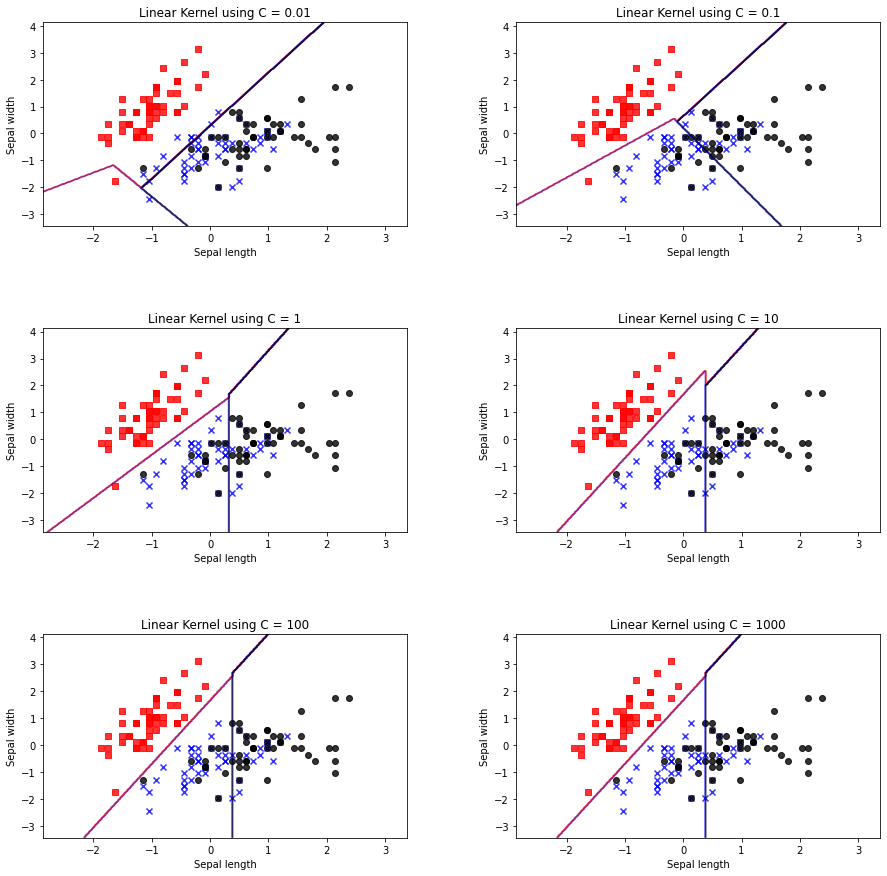

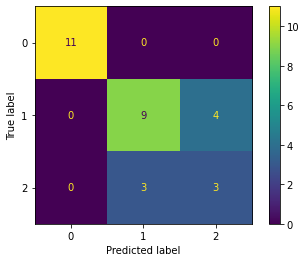

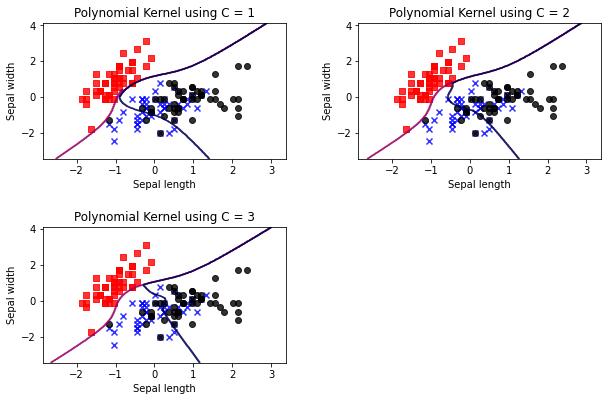

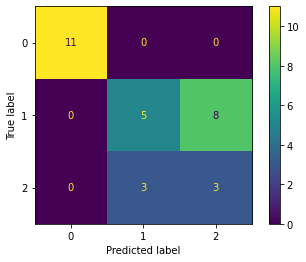

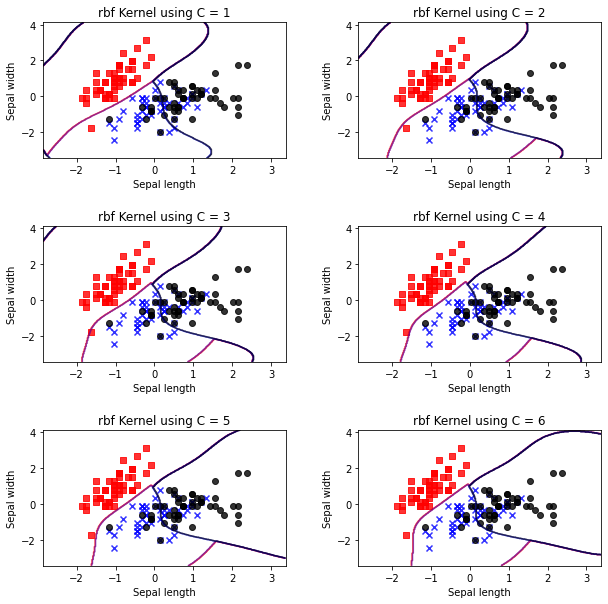

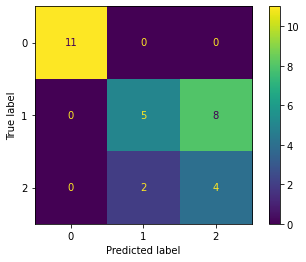

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

iris = datasets.load_iris()
 # Create the dataset by selecting two features from iris dataset
X1_sepal = iris.data[:,[0,1]]# Select the Sepal Width and Sepal Length 
y = iris.target

#Display the raw data after selecting two features from Iris dataset
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Define a function in order to create a SVM model and display the prediction
def plot_decision_regions(X,y,classifier,test_idx=None, h=0.02):
    
    markers = ('s','x','o')
    colors = ('red', 'blue', 'black')
    color_Map = ListedColormap(colors[:len(np.unique(y))])
    
    # Parameters for the graph and decision surface/ demonstration of support vectors
    x1_min, x1_max  = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, h), np.arange(x2_min,x2_max, h))
    # Predict the model 
    z_axis = classifier.predict(np.array([x1.ravel(),x2.ravel()]).T)
    z_axis = z_axis.reshape(x1.shape)
    
    plt.contour(x1,x2,z_axis,alpha=0.4,cmap = color_Map)
    plt.xlim(x1.min(),x1.max())
    plt.ylim(x2.min(),x2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = color_Map(idx), marker = markers[idx], label = cl)
   
# Splitting the dataset into Training and Testing sets    
X_train, X_test, y_train, y_test = train_test_split(X1_sepal,y,test_size=0.2,random_state=0)

# Standardization of features
s = StandardScaler()
X_train_std = s.fit_transform(X_train)
X_test_std = s.transform(X_test)

## COMBINING FOR FUTURE PLOTTING
X_combined_standard = np.vstack((X_train_std,X_test_std))
Y_combined= np.hstack((y_train, y_test))

def get_param(parameters, accuracy_table, type_of_classification, name):
    j=0
    for i in parameters:
        # Apply SVM model into training data
        svm =  SVC(kernel = type_of_classification, C = i, random_state = 0)
        svm.fit(X_train_std,y_train)
        
        # Predict using SVM model
        y_pred = svm.predict(X_test_std)
        
        # Saving accuracy score in table
        accuracy_table.iloc[j,1] = accuracy_score(y_test,y_pred)
        j += 1
        
        # Printing decision regions
        plt.subplot(3,2,j)
        plt.subplots_adjust(wspace= 0.3, hspace = 0.5)
        plot_decision_regions(X = X_combined_standard, y = Y_combined, classifier = svm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.title('%s Kernel using C = %s'%(name,i))  # Change the name for each graphes such as Linear, Polynomial and so on
    #Confusion matrix Display
    display_confusion_matrix(y_pred, svm)
    
    print("-------------------------------------------")
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification Report: \n:",classification_report(y_test, y_pred))
    print("-------------------------------------------")

def display_confusion_matrix(predicted, clf):
    cm=confusion_matrix(y_test, predicted, labels=clf.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

# Linear Kernel, Classification
C_param_range = [0.01,0.1,1,10,100 ,1000]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(15, 15))

get_param(C_param_range, acc_table, 'linear', 'Linear')
print(acc_table)

# Polynomial Kernel, Classification
polynomial_degree_range = [1,2,3] 

acc_table_poly = pd.DataFrame(columns = ['degree','Accuracy'])
acc_table_poly['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

get_param(polynomial_degree_range, acc_table_poly, 'poly', 'Polynomial')
print(acc_table_poly)

# SVM with Radial Basis Function kernel
rbf_degree_range = [1,2,3,4,5,6]

acc_table_rbf = pd.DataFrame(columns = ['degree','Accuracy'])
acc_table_rbf['degree'] = rbf_degree_range

plt.figure(figsize=(10, 10))

get_param(rbf_degree_range, acc_table_rbf, 'rbf', 'rbf')
print(acc_table_rbf)


 Problem 1- Part b

-------------------------------------------
Confusion Matrix: 
 [[27  0  0]
 [ 1 26  7]
 [ 0  8 21]]
Classification Report: 
:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.76      0.76      0.76        34
           2       0.75      0.72      0.74        29

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.82      0.82      0.82        90

-------------------------------------------
   C_parameter  Accuracy
0         0.01  0.477778
1         0.10  0.777778
2         1.00  0.855556
3        10.00  0.833333
4       100.00  0.822222
5      1000.00  0.822222


-------------------------------------------
Confusion Matrix: 
 [[24  3  0]
 [ 0 29  5]
 [ 0 15 14]]
Classification Report: 
:               precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.62      0.85      0.72        34
           2       0.74      0.48      0.58        29

    accuracy                           0.74        90
   macro avg       0.78      0.74      0.75        90
weighted avg       0.77      0.74      0.74        90

-------------------------------------------
   degree  Accuracy
0       1  0.733333
1       2  0.744444
2       3  0.744444


-------------------------------------------
Confusion Matrix: 
 [[27  0  0]
 [ 0 25  9]
 [ 0  2 27]]
Classification Report: 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.93      0.74      0.82        34
           2       0.75      0.93      0.83        29

    accuracy                           0.88        90
   macro avg       0.89      0.89      0.88        90
weighted avg       0.89      0.88      0.88        90

-------------------------------------------
   degree  Accuracy
0       1  0.844444
1       2  0.866667
2       3  0.866667
3       4  0.866667
4       5  0.866667
5       6  0.877778


<Figure size 1080x360 with 0 Axes>

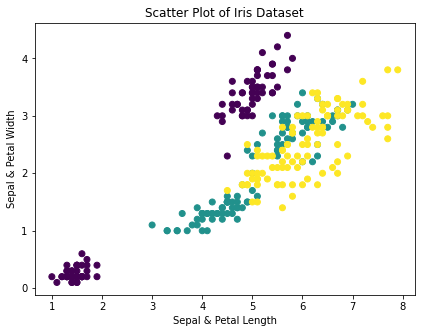

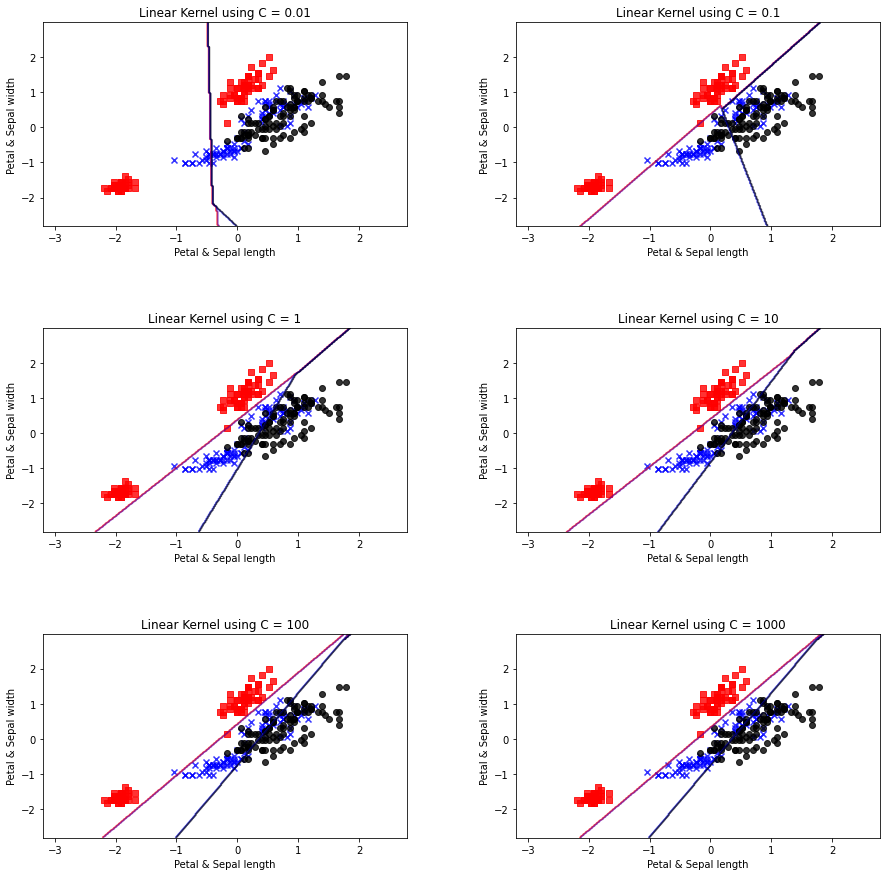

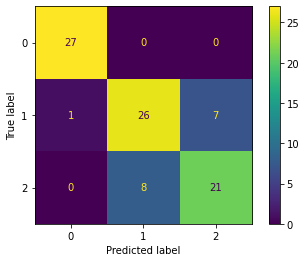

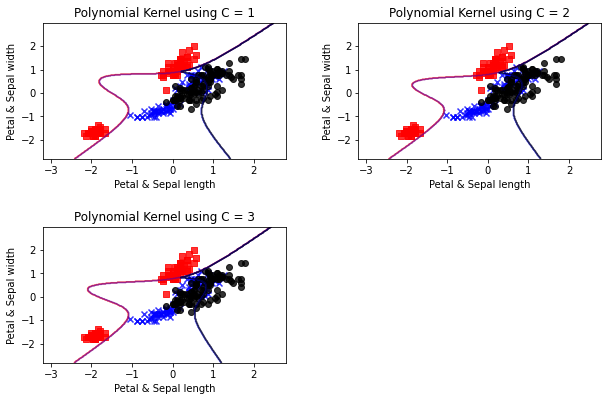

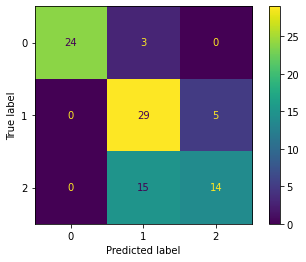

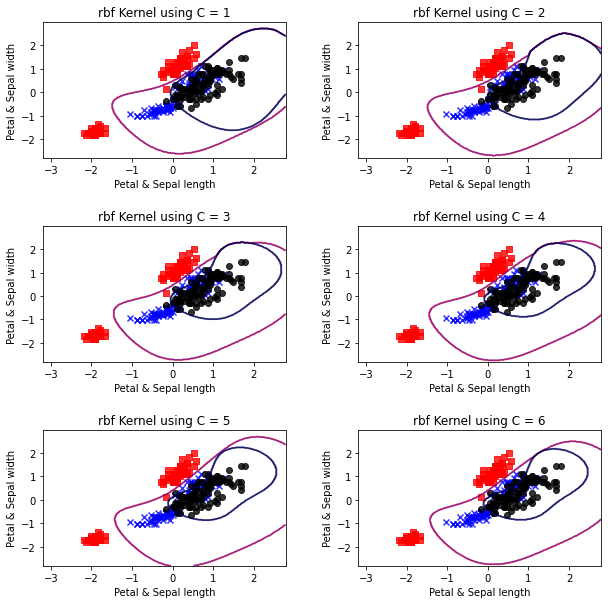

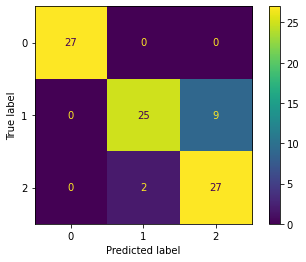

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

iris = datasets.load_iris() # upload the iris Dataset into python environment

X=iris.data
y=iris.target

X_sp_length=iris.data[:,[0,2]] # select the sepal length and petal length, and assign them into a matrix called X_sp_length
X_sp_width= iris.data[:,[1,3]] # select the sepal width and petal width, and assign them into a matrix called X_sp_width
y = iris.target  # assign y varaible to get the y values of taken inputs

plt.figure(figsize=(15, 5))  # create a figure on a console in specified size 

# Together the Sepal lenght and petal length and their y values into 1 array
X_length=np.append((iris.data[:, 0]),(iris.data[:,2]))
y_length=np.append(iris.target, iris.target)

# Together the Sepal lenght and petal length and their y values into 1 array
X_width=np.append((iris.data[:, 1]),(iris.data[:,3]))
y_width=np.append(iris.target, iris.target) 

# Display the initial dataset including petal and sepal attributes.
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X_length, X_width, c=y_width)
plt.xlabel('Sepal & Petal Length') # giave name to the x and y axis of scatter plot
plt.ylabel('Sepal & Petal Width')
plt.title('Scatter Plot of Iris Dataset')

def plot_decision_regions(X,y,classifier,test_idx=None, h=0.02):
    
    markers = ('s','x','o')
    colors = ('red', 'blue', 'black')
    color_Map = ListedColormap(colors[:len(np.unique(y))])
    
    # Parameters for the graph and decision surface
    x1_min, x1_max  = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, h), np.arange(x2_min,x2_max, h))
    
    z_axis = classifier.predict(np.array([x1.ravel(),x2.ravel()]).T)
    z_axis = z_axis.reshape(x1.shape)
    
    plt.contour(x1,x2,z_axis,alpha=0.4,cmap = color_Map)
    plt.xlim(x1.min(),x1.max())
    plt.ylim(x2.min(),x2.max())

    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = color_Map(idx), marker = markers[idx], label = cl)
   
# Splitting the dataset into Training and Testing sets       
X_total=np.array([X_length, X_width]).T
y_total=y_width 
X_train, X_test, y_train, y_test = train_test_split(X_total,y_total,test_size=0.3,random_state=0)

# Standardization of features
s = StandardScaler()
X_train_std = s.fit_transform(X_train)
X_test_std = s.transform(X_test)

X_combined_standard = np.vstack((X_train_std,X_test_std))
Y_combined = np.hstack((y_train, y_test))

def get_param(parameters, accuracy_table, type_of_classification, name):
    j=0
    for i in parameters:
        # Apply SVM model to training data
        svm =  SVC(kernel = type_of_classification, C = i, random_state = 0)
        svm.fit(X_train_std,y_train)
        
        # Predict using SVM model
        y_pred = svm.predict(X_test_std)
        
        # Saving accuracy score in table
        accuracy_table.iloc[j,1] = accuracy_score(y_test,y_pred)
        j += 1
        
        # Printing decision regions
        plt.subplot(3,2,j)
        plt.subplots_adjust(wspace= 0.3, hspace = 0.5)
        plot_decision_regions(X = X_combined_standard, y = Y_combined, classifier = svm)
        plt.xlabel('Petal & Sepal length')
        plt.ylabel('Petal & Sepal width')
        plt.title('%s Kernel using C = %s'%(name,i))  # Change the name for each graphes such as Linear, Polynomial and so on
    #Confusion matrix Display
    display_confusion_matrix(y_pred, svm)
    
    print("-------------------------------------------")
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification Report: \n:",classification_report(y_test, y_pred))
    print("-------------------------------------------")

def display_confusion_matrix(predicted, clf):
    cm=confusion_matrix(y_test, predicted, labels=clf.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()


# Linear Kernel, Classification
C_param_range = [0.01,0.1,1,10,100 ,1000]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(15, 15))

get_param(C_param_range, acc_table, 'linear', 'Linear')
print(acc_table)

# Polynomial Kernel, Classification
polynomial_degree_range = [1,2,3] 

acc_table_poly = pd.DataFrame(columns = ['degree','Accuracy'])
acc_table_poly['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

get_param(polynomial_degree_range, acc_table_poly, 'poly', 'Polynomial')
print(acc_table_poly)

# SVM with Radial Basis Function kernel
rbf_degree_range = [1,2,3,4,5,6]

acc_table_rbf = pd.DataFrame(columns = ['degree','Accuracy'])
acc_table_rbf['degree'] = rbf_degree_range

plt.figure(figsize=(10, 10))

get_param(rbf_degree_range, acc_table_rbf, 'rbf', 'rbf')
print(acc_table_rbf)


Problem 2

1797
(1437, 64)
(360, 64)
0.9305555555555556
Confusion Matrix: 
 [[34  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  2  0  0  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  3  0  1  0  0  0  1 28  0]
 [ 0  1  0  2  0  0  0  0  1 33]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.88      0.97      0.92        36
           2       1.00      1.00      1.00        35
           3       0.91      0.78      0.84        37
           4       0.94      0.92      0.93        37
           5       0.95      1.00      0.97        37
           6       1.00      0.97      0.99        37
           7       0.97      0.94      0.96        36
           8       0.76      0.85      0.80        33
           9       0.92      0.89      0.90        37

    accu

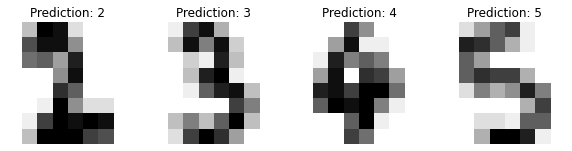

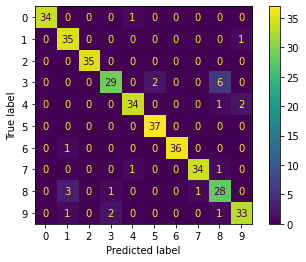

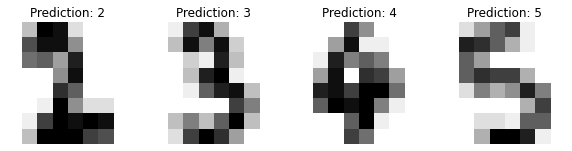

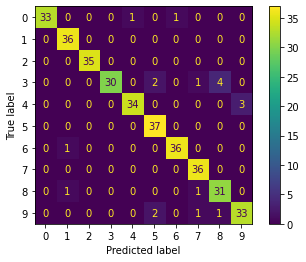

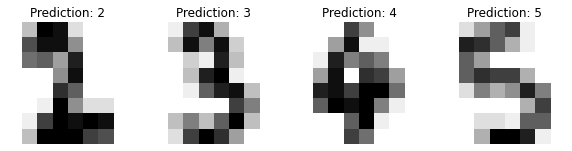

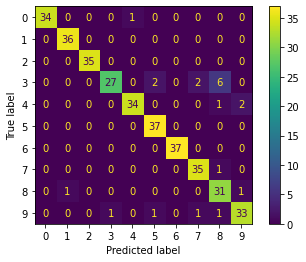

In [10]:
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


def display_predictedimg(predicted):
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image=image.reshape(8,8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Prediction: %i" % prediction)

def display_confusion_matrix(predicted, clf):
    cm=confusion_matrix(y_test, predicted, labels=clf.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    print("Confusion Matrix: \n", disp.confusion_matrix)
    disp.plot()

def print_classification_report(predicted):
    print(classification_report(y_test, predicted))

digits=load_digits()

# Define Variables
n_samples=len(digits.images) # how many images are there?
print(n_samples)

# divide the dataset into input features and output target label
X=digits.images.reshape((n_samples, -1))  # get the input features that are pixel
y=digits.target # Output: target labels


# Divide the dataset into Training and testing sets by random splitting of images in digits dataset
X_train, X_test, y_train, y_test=(train_test_split(X,y, test_size=0.2, shuffle=False))
# Display the Training ang Testing Inputs
print(X_train.shape)
print(X_test.shape)

# Define the Support Vector Classifier Model with Linear Kernel
linear_model=svm.SVC(kernel='linear', degree=1, gamma='scale')
linear_model.fit(X_train, y_train)

# Do prediction from training dataset that is fitted above
y_pred=linear_model.predict(X_test)

#Display the predicted model
display_predictedimg(y_pred)
    
# Evaluate the created model using accuracy
print(linear_model.score(X_test, y_test)) # Accuracy of Linear Kernel

# Confusion Matrix
display_confusion_matrix(y_pred, linear_model)

# Classification report
print_classification_report(y_pred)

print("------------- Polynamial Kernel -------------")

poly_model=svm.SVC(degree=3, gamma='scale', kernel='poly')
poly_model.fit(X_train, y_train)

#get the prediction from training data
y_pred_poly=poly_model.predict(X_test)

#Display the predicted model
display_predictedimg(y_pred_poly)

# Evaluate the created model using accuracy
print(poly_model.score(X_test, y_test)) # Accuracy of Polynomial Kernel

# Confusion Matrix
display_confusion_matrix(y_pred_poly, poly_model)
# Classification Report
print_classification_report(y_pred_poly)

print("------------- RBF Kernel -------------")

# Compare the model by creating another model with Kernel type RBF and then, evaluate for accuracy
rbf_model=svm.SVC(degree=5, gamma='scale', kernel='rbf')
rbf_model.fit(X_train, y_train)

# get the prediction from training data
y_pred_rbf=rbf_model.predict(X_test)

# Display the predicted imaged by using RBF Kernel
display_predictedimg(y_pred_rbf)
    
# Apply the predicted parameters on testing sets
print(rbf_model.score(X_test, y_test)) # Accuracy of RBF Kernel

# Confusion Matrix
display_confusion_matrix(y_pred_rbf, rbf_model)

# Classification Report
print_classification_report(y_pred_rbf)


Problem 3

1797
Prediction obtained from One Hidden Layers:  0.9138888888888889
Confusion Matrix: 
 [[34  0  0  0  0  0  1  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  4]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  3  0  3  4  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 1  0  0  0  0  0  0 32  3  0]
 [ 0  1  0  0  1  0  0  0 30  1]
 [ 0  0  0  0  0  2  0  1  2 32]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.94      0.89      0.91        36
           2       1.00      1.00      1.00        35
           3       1.00      0.73      0.84        37
           4       0.97      0.92      0.94        37
           5       0.88      1.00      0.94        37
           6       0.97      0.97      0.97        37
           7       0.89      0.89      0.89        36
           8       0.75      0.91      0.82        33
           9       0.82      0.86      

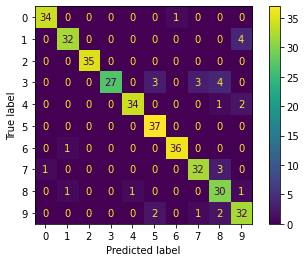

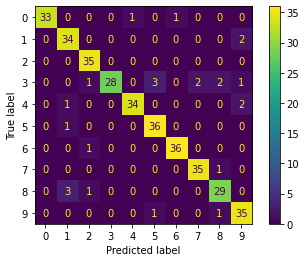

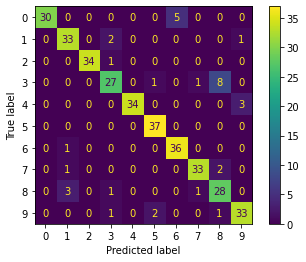

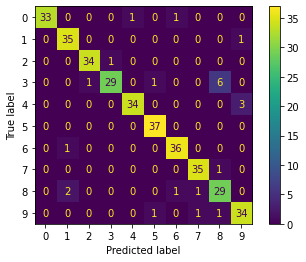

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


def display_confusion_matrix(predicted, clf):
    cm=confusion_matrix(y_test, predicted, labels=clf.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    print("Confusion Matrix: \n", disp.confusion_matrix)
    disp.plot()

def print_classification_report(predicted):
    print(classification_report(y_test, predicted))


# Load the digits data set from Scikit-learn
digits=load_digits()

# Define Variables
n_samples=len(digits.images) # how many images are there?
print(n_samples)

# Divide the dataset into input features and output target label
X=digits.images.reshape((n_samples, -1))  # get the input features that are pixel
y=digits.target # Output: target labels

# Divide the dataset into Training (80%) and testing (20%) sets by random splitting of images in digits dataset
X_train, X_test, y_train, y_test=(train_test_split(X,y, test_size=0.2, shuffle=False))

# Create the MLPClassifier Model

# One Hidden Layer
mlpc_model=MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100,)).fit(X_train, y_train)
# Test the obtained parameters on test sets
y_pred=mlpc_model.predict(X_test)
# Display the accuracy score for prediction
print("Prediction obtained from One Hidden Layers: ", accuracy_score(y_test, y_pred))


# Confusion Matrix
display_confusion_matrix(y_pred, mlpc_model)

# Classification report
print_classification_report(y_pred)

# Two Hidden Layer
mlpc_model_2=MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100,100)).fit(X_train, y_train)
# Test the obtained parameters on test sets
y_pred_2=mlpc_model_2.predict(X_test)
# Display the accuracy score for prediction
print("Prediction obtained from Two Hidden Layers: ", accuracy_score(y_test, y_pred_2))

# Confusion Matrix
display_confusion_matrix(y_pred_2, mlpc_model_2)

# Classification report
print_classification_report(y_pred_2)

# Different numbers of Hidden Units: First Hidden Layer includes 20 units and Second one includes 50 units
mlpc_model_3=MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(20,50)).fit(X_train, y_train)
# Test the obtained parameters on test sets
y_pred_3=mlpc_model_3.predict(X_test)
# Display the accuracy score for prediction
print("Prediction obtained from 20 Hidden Units vs 50 Hidden Units: ", accuracy_score(y_test, y_pred_3))

# Confusion Matrix
display_confusion_matrix(y_pred_3, mlpc_model_3)

# Classification report
print_classification_report(y_pred_3)


# Different numbers of Hidden Units: First Hidden Layer includes 70 units and Second one includes 130 units
mlpc_model_4=MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(70,130)).fit(X_train, y_train)
# Test the obtained parameters on test sets
y_pred_4=mlpc_model_4.predict(X_test)
# Display the accuracy score for prediction
print("Prediction obtained from 70 Hidden Units vs 130 Hidden Units: ",accuracy_score(y_test, y_pred_4))

# Confusion Matrix
display_confusion_matrix(y_pred_4, mlpc_model_4)

# Classification report
print_classification_report(y_pred_4)